Importing Libraries

In [3]:
import bs4
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
print('Librarires Successully Imported')

Librarires Successully Imported


Defining the function for our Data Scraping

In [4]:
def get_basketball_stats(link='https://en.wikipedia.org/wiki/Michael_Jordan'):
    # read the webpage
    response = requests.get(link)
    # create a BeautifulSoup object to parse the HTML
    soup = bs4.BeautifulSoup(response.text, 'html.parser')
    # the player stats are defined  with the attribute CSS class set to 'wikitable sortable';
    #therefore we create a tag object "table"
    table = soup.find(class_='wikitable sortable')

    #the headers of the table are the first table row (tr) we create a tag object that has the first row
    headers = table.tr
    titles = headers.find_all('abbr')
    #we create a dictionary  and pass the table headers as the keys
    data = {title['title']: [] for title in titles}
    #we will store each column as a list in a dictionary, the header of the column will be the dictionary key


    #we iterate over each table row by fining each table tag tr and assign it to the object
    for row in table.find_all('tr')[1:]:
        #we iterate over each cell in the table, as each cell corresponds to a different column we all obtain the correspondin key corresponding the column n
        for key, a in zip(data.keys(),row.find_all('td')[2:]):
            data[key].append(''.join(c for c in a.text if (c.isdigit() or c == '.')))

        # we remove extra rows by finding the smallest list
        Min = min([len(x) for x in data.values()])
        #we convert the elements in the key to floats
        for key in data.keys():
            data[key] = list(map(lambda x: float(x), data[key][:Min]))
    return data


Starting of with a function we ahve taken tthe url and passed to the request library and then we have recieved the data in the format of html whi inturn passed  it into the beatuifulsoup 4 library for html

In [5]:
links=['https://en.wikipedia.org/wiki/Michael_Jordan'\
       ,'https://en.wikipedia.org/wiki/Kobe_Bryant', ]
names=['Michael Jordan','Kobe Bryant']

In [6]:
michael_jordan_dict = get_basketball_stats(links[0])
kobe_bryant_dict = get_basketball_stats(links[1])


In [7]:
mj_table = pd.DataFrame(michael_jordan_dict)
kb_table = pd.DataFrame(kobe_bryant_dict)


In [9]:
mj_table
kb_table

,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,71.0,6.0,15.5,0.417,0.375,0.819,1.9,1.3,0.7,0.3,7.6
1,79.0,1.0,26.0,0.428,0.341,0.794,3.1,2.5,0.9,0.5,15.4
2,50.0,50.0,37.9,0.465,0.267,0.839,5.3,3.8,1.4,1.0,19.9
3,66.0,62.0,38.2,0.468,0.319,0.821,6.3,4.9,1.6,0.9,22.5
4,68.0,68.0,40.9,0.464,0.305,0.853,5.9,5.0,1.7,0.6,28.5
5,80.0,80.0,38.3,0.469,0.250,0.829,5.5,5.5,1.5,0.4,25.2
6,82.0,82.0,41.5,0.451,0.383,0.843,6.9,5.9,2.2,0.8,30.0
7,65.0,64.0,37.6,0.438,0.327,0.852,5.5,5.1,1.7,0.4,24.0
8,66.0,66.0,40.7,0.433,0.339,0.816,5.9,6.0,1.3,0.8,27.6
9,80.0,80.0,41.0,0.450,0.347,0.850,5.3,4.5,1.8,0.4,35.4


In [12]:
list_table =[mj_table, kb_table]

i = 0
for name in names:
    print(name)
    display(list_table[i].tail(6))
    i += 1
    

Michael Jordan


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
9,17.0,17.0,39.3,0.411,0.500,0.801,6.9,5.3,1.8,0.8,26.9
10,82.0,82.0,37.7,0.495,0.427,0.834,6.6,4.3,2.2,0.5,30.4
11,82.0,82.0,37.9,0.486,0.374,0.833,5.9,4.3,1.7,0.5,29.6
12,82.0,82.0,38.8,0.465,0.238,0.784,5.8,3.5,1.7,0.5,28.7
13,60.0,53.0,34.9,0.416,0.189,0.790,5.7,5.2,1.4,0.4,22.9
14,82.0,67.0,37.0,0.445,0.291,0.821,6.1,3.8,1.5,0.5,20.0


Kobe Bryant


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
14,82.0,82.0,33.9,0.451,0.323,0.828,5.1,4.7,1.2,0.1,25.3
15,58.0,58.0,38.5,0.430,0.303,0.845,5.4,4.6,1.2,0.3,27.9
16,78.0,78.0,38.6,0.463,0.324,0.839,5.6,6.0,1.4,0.3,27.3
17,6.0,6.0,29.5,0.425,0.188,0.857,4.3,6.3,1.2,0.2,13.8
18,35.0,35.0,34.5,0.373,0.293,0.813,5.7,5.6,1.3,0.2,22.3
19,66.0,66.0,28.2,0.358,0.285,0.826,3.7,2.8,0.9,0.2,17.6


In [13]:
import matplotlib.pyplot as plt

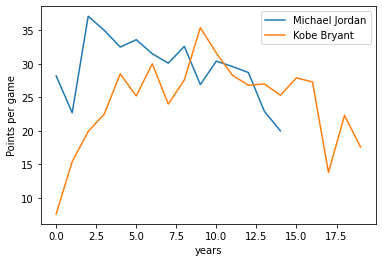

In [16]:

j = 0
for name in names:
    plt.plot(list_table[j][['Points per game']],label=name)
    plt.legend()
    plt.xlabel('years')
    plt.ylabel('Points per game')

    j += 1

In [17]:
csv_name = 'MJ1.csv'
mj_table.to_csv(csv_name)